In [2]:
import pandas as pd
import numpy as np

In [73]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
!python --version

Python 3.9.12


In [52]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### loading data

In [10]:
df = pd.read_parquet('data/fhv_tripdata_2021-01.parquet')

In [14]:
df.shape

(1154112, 7)

### Task 1
1_154_112

In [13]:
df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')

In [12]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [15]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [18]:
(df['dropOff_datetime']-df['pickup_datetime']).mean()

Timedelta('0 days 00:19:10.033445627')

### Task 2
19 minutes 10 seconds

In [21]:
df['duration'] = df['dropOff_datetime']-df['pickup_datetime']

In [22]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13


In [31]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [32]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [23]:
df.dtypes

dispatching_base_num               object
pickup_datetime            datetime64[ns]
dropOff_datetime           datetime64[ns]
PUlocationID                      float64
DOlocationID                      float64
SR_Flag                            object
Affiliated_base_number             object
duration                  timedelta64[ns]
dtype: object

In [33]:
df.duration.mean()

19.1672240937939

### remove outliers

<AxesSubplot:>

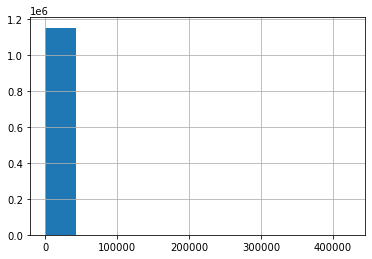

In [36]:
df.duration.hist()

In [38]:
df.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [42]:
df.shape, df[df.duration.between(1, 60)].shape

((1154112, 8), (1109826, 8))

In [43]:
1_154_112-1_109_826

44286

In [44]:
df = df[df.duration.between(1, 60)]

<AxesSubplot:>

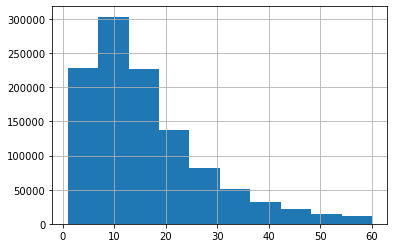

In [45]:
df.duration.hist()

In [46]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [49]:
df.fillna(value={'PUlocationID': -1, 'DOlocationID':-1}, inplace=True)

In [53]:
df['PUlocationID'].value_counts(dropna=False, normalize=True)

-1.000    0.835
221.000   0.008
206.000   0.006
129.000   0.005
115.000   0.004
           ... 
111.000   0.000
27.000    0.000
34.000    0.000
2.000     0.000
110.000   0.000
Name: PUlocationID, Length: 262, dtype: float64

### Task 3
83.5%

### OHE

In [54]:
categorical = ['PUlocationID', 'DOlocationID']

In [55]:
df[categorical].dtypes

PUlocationID    float64
DOlocationID    float64
dtype: object

In [60]:
df[categorical] = df[categorical].astype(str)

In [61]:
df[categorical].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [64]:
train_dict = df[categorical].to_dict(orient='records')

In [65]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [67]:
dv.feature_names_[:10]

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0']

In [79]:
len(dv.feature_names_)

525

### Task 4
525

In [69]:
target = 'duration'
y = df[target].values

### model

In [71]:
reg = LinearRegression().fit(X_train, y)

In [72]:
reg.score(X_train, y)

0.16927348635166672

In [74]:
y_pred = reg.predict(X_train)

In [77]:
mean_squared_error(y, y_pred, squared=False)

10.528519107205451

### Task 5
10.52

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/michal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/michal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


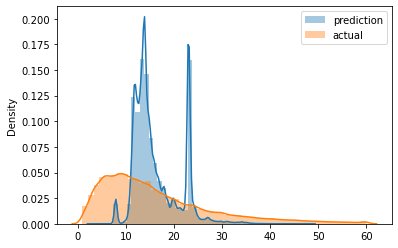

In [86]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y, label='actual')
plt.legend()

### test dataset

In [115]:
df_test = pd.read_parquet('data/fhv_tripdata_2021-02.parquet')

In [116]:
df_test['duration'] = df_test['dropOff_datetime']-df_test['pickup_datetime']

In [117]:
df_test['duration'] = df_test['duration'].dt.total_seconds()/60

In [118]:
df_test = df_test[df_test.duration.between(1, 60)]

In [119]:
df_test.fillna(value={'PUlocationID': -1, 'DOlocationID':-1}, inplace=True)

In [120]:
df_test[categorical] = df_test[categorical].astype(str)

In [121]:
test_dict = df_test[categorical].to_dict(orient='records')

In [123]:
X_test = dv.transform(test_dict)

In [124]:
y_test = df_test['duration'].values

In [125]:
y_test

array([10.66666667, 14.56666667,  7.95      , ..., 25.38333333,
       18.05      , 16.        ])

In [126]:
y_pred_test = reg.predict(X_test)

In [127]:
mean_squared_error(y_test, y_pred_test, squared=False)

11.014283139629091

### Task 6
11.01

In [135]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df['dropOff_datetime']-df['pickup_datetime']
    df['duration'] = df['duration'].dt.total_seconds()/60
    
    df = df[df.duration.between(1, 60)]
    
    df.fillna(value={'PUlocationID': -1, 'DOlocationID':-1}, inplace=True)
    df[categorical] = df[categorical].astype(str)
    return df

In [136]:
df_train = read_dataframe('data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('data/fhv_tripdata_2021-02.parquet')

In [137]:
df_train.shape, df_val.shape

((1109826, 8), (990113, 8))

In [139]:
train_dict = df_train[categorical].to_dict(orient='records')
val_dict = df_val[categorical].to_dict(orient='records')

In [140]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [141]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [142]:
reg = LinearRegression().fit(X_train, y_train)
y_pred_train = reg.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

10.528519107205451

In [144]:
y_pred_val = reg.predict(X_val)

mean_squared_error(y_val, y_pred_test, squared=False)

11.014283139629091